In [5]:
%%writefile project.py
#!/usr/bin/env python
import wx
import os
class MainWindow(wx.Frame):
    def __init__(self, parent, title):
        wx.Frame.__init__(self, parent, title=title)
        self.control = wx.TextCtrl(self, style=wx.TE_MULTILINE)
        self.CreateStatusBar()
        
        filemenu=wx.Menu()
        menuOpen= filemenu.Append(wx.ID_OPEN, "&Open", "Open text file")
        filemenu.AppendSeparator()
        menuExit= filemenu.Append(wx.ID_EXIT,"E&xit", "Terminate this program")
        
        helpmenu=wx.Menu()
        menuAbout= helpmenu.Append(wx.ID_ABOUT, "&About", "Information about this program")
        
        menuBar=wx.MenuBar()
        menuBar.Append(filemenu,"&File")
        menuBar.Append(helpmenu, "&Help")
        self.SetMenuBar(menuBar)
        
        self.Bind(wx.EVT_MENU, self.OnAbout, menuAbout)
        self.Bind(wx.EVT_MENU, self.OnOpen, menuOpen)
        self.Bind(wx.EVT_MENU, self.OnExit, menuExit)
        
        
        self.sizer2=wx.BoxSizer(wx.HORIZONTAL)
        Buttons= self.buttons =[]
        self.buttons.append(wx.Button(self, 0, "Open"))
        self.sizer2.Add(self.buttons[0], 1, wx.EXPAND)
        self.Bind(wx.EVT_BUTTON, self.OnOpen, Buttons[0])
        for i in range(1,6):
            self.buttons.append(wx.Button(self, 0, "Button &"+str(i)))
            self.sizer2.Add(self.buttons[i], 1, wx.EXPAND)
            
        self.sizer = wx.BoxSizer(wx.VERTICAL)
        self.sizer.Add(self.sizer2, 0, wx.EXPAND)
        self.sizer.Add(self.control, 1, wx.EXPAND)
        
        self.SetSizer(self.sizer)
        self.SetAutoLayout(1)
        #self.sizer.Fit(self)     
        self.SetSize((500,400))
        
        self.Show(True)
        
    
    def OnAbout(self,e):
        dlg = wx.MessageDialog(self, "A small yet undefined project", "About this project", wx.OK)
        dlg.ShowModal()
        dlg.Destroy()
        
    def OnExit(self,e):
        wx.ColourPickerCtrl()
        
    def OnOpen(self,e):
        self.dirname=''
        dlg = wx.FileDialog(self, "Choose a file", self.dirname, "", "*.*", wx.OPEN)
        if dlg.ShowModal() == wx.ID_OK:
            self.filename = dlg.GetFilename()
            self.dirname = dlg.GetDirectory()
            f = open(os.path.join(self.dirname, self.filename), 'r')
            self.control.SetValue(f.read())
            f.close()
        dlg.Destroy
        
        
app = wx.App(False)
frame = MainWindow(None, "Project")
app.MainLoop()

Overwriting project.py


In [6]:
!./project.py

Traceback (most recent call last):
  File "./project.py", line 55, in OnExit
    wx.ColourPickerCtrl()
  File "/home/csat8786/anaconda2/lib/python2.7/site-packages/wx-3.0-gtk2/wx/_controls.py", line 6923, in __init__
    _controls_.ColourPickerCtrl_swiginit(self,_controls_.new_ColourPickerCtrl(*args, **kwargs))
TypeError: Required argument 'parent' (pos 1) not found


In [4]:
!chmod +x project.py

In [31]:
import wx
import os
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
#from astropy.nddata import Cutout2D
import numpy as np
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.figure import Figure

%matplotlib inline

In [23]:

image=np.sqrt(1+np.sqrt(fits.getdata('red.fits')+2))

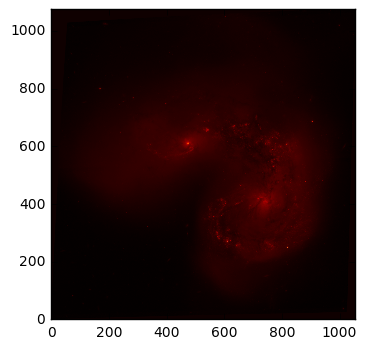

In [25]:
plt.imshow(image, cmap='gist_heat', origin='lower')

In [27]:
image=fits.open("red.fits")

In [30]:
header=image['PRIMARY'].header
ata=image['PRIMARY'].data
image.close()

In [32]:
wcs=WCS(header)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


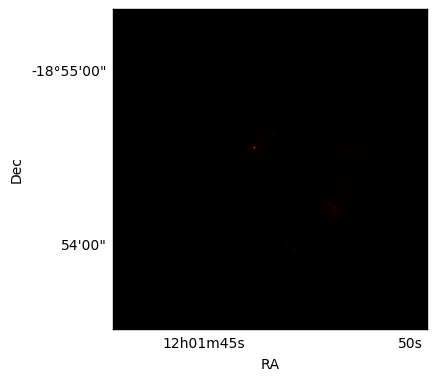

In [33]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(data, cmap='gist_heat', origin='lower')
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

In [1]:
import wx
import os
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
#from astropy.nddata import Cutout2D
import numpy as np
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.figure import Figure

%matplotlib inline

In [81]:
from astroquery.ned import Ned
import astropy.units as u
images = Ned.get_table("NGC 224")
x=images["Frequency"]
print(len(x))
mask=(x<1e10)*(x>1e8)
x[mask]
np.where(mask)
images[mask]

test=Ned.get_image_list("NGC 224")
print(len(test))

147
279


In [72]:
prueba=images["Refcode"][mask]
print(prueba[2])
#imag=Ned.get_images(prueba[1])
imag=Ned.query_refcode(prueba[2], get_query_payload=True)

2009ApJ...693.1392S


{'corr_z': u'1',
 'extend': 'no',
 'hconst': u'73',
 'img_stamp': 'NO',
 'list_limit': 0,
 'obj_sort': u'RA or Longitude',
 'of': 'xml_main',
 'omegam': 0.27,
 'omegav': 0.73,
 'out_csys': u'Equatorial',
 'out_equinox': u'J2000.0',
 'refcode': '2009ApJ...693.1392S',
 'search_type': 'Search'}

In [80]:
image = Ned.get_image_list("NGC 224")
image

[u'http://ned.ipac.caltech.edu/dss1B2/Bb/MESSIER_031:I:IIIaJ:dss1.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw16.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw19.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw20.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw21.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw22.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:newsum.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:sw10.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:ne06.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:ne05.fits.gz',
 u'http://ned.ipac.caltech.edu/img/1983MNRAS.205..787U/MESSIER_031:I:HI:u1983:ne14.fi

In [101]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("ngc224")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,unicode13,unicode13,int16,int16,float32,float32,int16,unicode1,unicode1,object
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,B,I,2006AJ....131.1163S


In [107]:
from astroquery.skyview import SkyView
path=SkyView.get_images(position='ngc224', survey=['SDSSg'])
path

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f67cfad87d0>]]